#  Predicting The Weather Using Machine Learning

In this project, we'll predict the weather using machine learning.

We'll be working with weather data from a station at the Oakland International Airport. The data is from 1960 through 2021. Each row in the data represents one day, and the columns represent different weather measurements.



In [1]:
# Reading in the initial data

import pandas as pd

weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [2]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [3]:
weather.columns

Index(['STATION', 'NAME', 'ACMH', 'ACSH', 'AWND', 'DAPR', 'FMTM', 'FRGT',
       'MDPR', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TSUN',
       'WDF1', 'WDF2', 'WDF5', 'WDFG', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT07', 'WT08', 'WT09', 'WT16', 'WT18'],
      dtype='object')

### Preparing the Data

Now that we've read the data into pandas, let's do some data preparation. We'll simplify our data and remove many of the unnecessary columns.

Here are the primary columns that we need:

- PRCP — total precipitation
- TMAX — maximum daily temperature
- TMIN — minimum daily temperature
- SNOW — the total daily snowfall
- SNWD — total snow depth on the ground

In [4]:
#getting only the columsn that we need
weather= weather[['PRCP', 'TMAX','TMIN', 'SNOW','SNWD']]

In [5]:
weather.head()

,PRCP,TMAX,TMIN,SNOW,SNWD
DATE,,,,,
1960-01-01,0.0,49.0,30.0,0.0,0.0
1960-01-02,0.0,49.0,29.0,0.0,0.0
1960-01-03,0.0,54.0,35.0,0.0,0.0
1960-01-04,0.0,54.0,36.0,0.0,0.0
1960-01-05,0.0,55.0,33.0,0.0,0.0


In [6]:
#checkign for mssing values
weather.isnull().sum()

PRCP     281
TMAX       9
TMIN      10
SNOW    5479
SNWD    5355
dtype: int64

In [7]:
#renaming column names
weather = weather.rename(columns={'PRCP': 'total_precipitation', 'TMAX': 'max_daily_temp','TMIN': 'min_daily_temp', 'SNOW': 'daily_snowfall','SNWD': 'total_snow_depth'})

In [8]:
weather

,total_precipitation,max_daily_temp,min_daily_temp,daily_snowfall,total_snow_depth
DATE,,,,,
1960-01-01,0.0,49.0,30.0,0.0,0.0
1960-01-02,0.0,49.0,29.0,0.0,0.0
1960-01-03,0.0,54.0,35.0,0.0,0.0
1960-01-04,0.0,54.0,36.0,0.0,0.0
1960-01-05,0.0,55.0,33.0,0.0,0.0
...,...,...,...,...,...
2022-01-24,0.0,60.0,39.0,NaN,NaN
2022-01-25,0.0,57.0,43.0,NaN,NaN
2022-01-26,0.0,57.0,41.0,NaN,NaN


In [9]:
weather['daily_snowfall'].value_counts()

0.0    11379
1.0        1
Name: daily_snowfall, dtype: int64

Based on the values above we can see that the daily snowfall column has a lot of 0 in its column and only 1 values for 1. Based on this we can remove this column in the data there is only 1 day of snow and we will not have any historical data on what happen when it snows.

In [10]:
weather['total_snow_depth'].value_counts()

0.0    11504
Name: total_snow_depth, dtype: int64

Simarily we will delete thsi column as well as the total snow depth is only 0 which will not help in analysing the data

In [11]:
del weather['total_snow_depth']

In [12]:
del weather['daily_snowfall']

### Filling in Missing Data

Now that we have our five core columns, we can focus on filling in any missing data. This is important because most machine learning algorithms can't work with missing data. To resolve this, we'll need to fill in the missing values or remove the rows/columns.


In [13]:
weather

,total_precipitation,max_daily_temp,min_daily_temp
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2022-01-24,0.0,60.0,39.0
2022-01-25,0.0,57.0,43.0
2022-01-26,0.0,57.0,41.0


In [14]:
weather.isnull().sum()

total_precipitation    281
max_daily_temp           9
min_daily_temp          10
dtype: int64

In [15]:
weather['total_precipitation'].value_counts()

0.00    13664
0.01      438
0.02      199
0.03      122
0.04      102
        ...  
1.19        1
1.88        1
2.39        1
1.59        1
2.37        1
Name: total_precipitation, Length: 176, dtype: int64

Based on what we see here is that most days there are 0 in precipition. Using this logic we can fill in 281 missing with 0 as the vast majority of the days had no precipation and the the other days that there were preceipation they were still greatly less than 0.



In [16]:
weather['total_precipitation']=weather['total_precipitation'].fillna(0)

In [17]:
weather.isnull().sum()

total_precipitation     0
max_daily_temp          9
min_daily_temp         10
dtype: int64

In [18]:
weather['max_daily_temp'].value_counts()

67.0     831
68.0     830
60.0     823
66.0     808
65.0     808
        ... 
100.0      2
38.0       1
39.0       1
107.0      1
122.0      1
Name: max_daily_temp, Length: 66, dtype: int64

In [19]:
weather[pd.isnull(weather['max_daily_temp'])]

,total_precipitation,max_daily_temp,min_daily_temp
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [20]:
weather[pd.isnull(weather['min_daily_temp'])]

,total_precipitation,max_daily_temp,min_daily_temp
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


Based on the two tables we see above we can either drop both of these rows or we can fill in the missing values using a foward fill. In this case we will use foward fill as usually with temperature they are usually around the same tempertaure as the previous day. 

We could have also dropped the rows as well as the missing values are so small that dropping them would not have made a big impact on the overall performance

In [21]:
weather=weather.fillna(method='ffill')

In [22]:
weather.isnull().sum()

total_precipitation    0
max_daily_temp         0
min_daily_temp         0
dtype: int64

In [23]:
#checking to see if the dataframe has a value of 9999 as that will represent an error

weather[weather['total_precipitation']==9999]

,total_precipitation,max_daily_temp,min_daily_temp
DATE,,,


In [24]:
weather[weather['max_daily_temp']==9999]

,total_precipitation,max_daily_temp,min_daily_temp
DATE,,,


In [25]:
weather[weather['min_daily_temp']==9999]

,total_precipitation,max_daily_temp,min_daily_temp
DATE,,,


### Verifying Data Types

Now that we've filled in the missing data, let's ensure that our columns are the correct data types. Machine learning algorithms can only work with numeric data types. Additionally, having our index in the correct datetime format will enable us to calculate predictor columns more easily.

In [26]:
#checking the columns are numeric
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_precipitation  16859 non-null  float64
 1   max_daily_temp       16859 non-null  float64
 2   min_daily_temp       16859 non-null  float64
dtypes: float64(3)
memory usage: 526.8+ KB


In [27]:
#checking the index is datetime
weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

In [28]:
#changing the date to datetime
weather.index = pd.to_datetime(weather.index)

In [29]:
#converting the indx into a year as it will be easier to work with
#weather.index=weather.index.year

In [30]:
weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

In [31]:
#converting the index to a year column
#weather['year'] = weather.index

### Analyzing Weather Data

Now that we've prepared our data, we can do some analysis and create plots to visualize weather over time. In our exploration, we'll find that we're missing a few years of data. 

In [32]:
weather.head()

,total_precipitation,max_daily_temp,min_daily_temp
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0


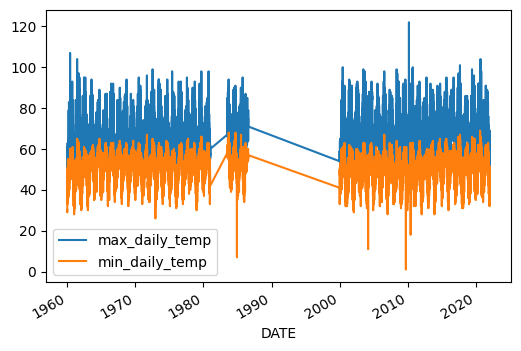

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
weather[['max_daily_temp','min_daily_temp']].plot()

Based on the graph above we can see that we are missing some data from the year 1990 to 2000/1999 and 1983 to 1985 (roughly).

In [34]:
weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    364
2022     28
Name: DATE, dtype: int64

Based on the information above we are missing a few dates but because this is historical data, it should be fine. If we really wanted to we could have gone back and see why it was missing or we could have gotten the data from another weather station to fill it in.

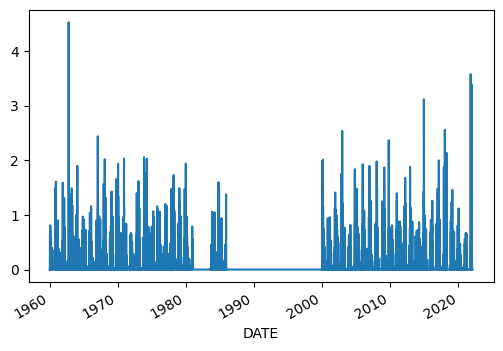

In [35]:
weather['total_precipitation'].plot()

In [36]:
#finding how much it rained using the index per year
yearly_rain=weather.groupby(weather.index.year).sum()['total_precipitation']
yearly_rain

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     0.25
Name: total_precipitation, dtype: float64

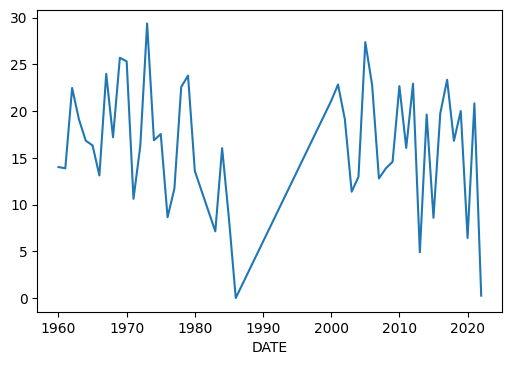

In [37]:
yearly_rain.plot()


### Training an Initial Model
Now that we've prepared our columns, we're ready to train our initial machine learning model!

We'll be predicting tomorrow's temperature given historical data. In order to do this, we need to create a target column, then create a train and test set and train a model.

We have to respect the time series nature of the data when we split it into "train" and "test" sets. We can't use future data to predict the past


To figure out what the target varible is going to be we need to know what the tempertaure for the previous day was. To do that we are going to use the command shift. What shift does is that given a column (in this case max_daily_temp) it will shift the value by that amount. In our case since we need the target varible to be the previous day so our shift is going to be -1 to show that we are taking the previous day tempertaure. 

As a side note the last value will not have a value as there is no value after that, so we will need to remove it.

In [38]:
weather['target']=weather.shift(-1)['max_daily_temp']

In [39]:
weather.head()

,total_precipitation,max_daily_temp,min_daily_temp,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0


In [40]:
weather.tail()

,total_precipitation,max_daily_temp,min_daily_temp,target
DATE,,,,
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0
2022-01-27,0.0,67.0,39.0,64.0
2022-01-28,0.0,64.0,39.0,NaN


In [41]:
#dropping the last row
weather=weather.iloc[:-1]

In [42]:
#confiming the drop
weather.tail()

,total_precipitation,max_daily_temp,min_daily_temp,target
DATE,,,,
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0
2022-01-27,0.0,67.0,39.0,64.0


In [43]:
# we will be using a ridge regression 
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [44]:
#manully doing the split
train = weather.loc[:"2020-12-31"]
test =weather.loc["2021-01-01":]
pred=['total_precipitation','max_daily_temp','min_daily_temp']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(weather.drop('target',axis=1), 
                                                    weather['target'], test_size=0.30, 
                                                    random_state=101)

In [46]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [47]:
predictions = reg.predict(X_test)

### Measuring Accuracy

Now that we've created a model, we can evaluate its accuracy. This will let us know how good the model is at making predictions, and it will inform how we improve the model.


In [48]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test,predictions))

20.775984810624454


To make it easier on the eyes we are going to make a dataframe that shows the actual value vs the target value.

In [49]:
base = pd.DataFrame()
base["actual"] = y_test
base["predictions"] = predictions

In [50]:
base

,actual,predictions
DATE,,
2013-03-01,68.0,69.232841
1970-02-20,62.0,65.690216
2015-08-22,73.0,74.392344
2009-02-28,62.0,62.716452
1986-04-07,69.0,66.548611
...,...,...
2016-09-26,84.0,87.614743
1962-01-08,73.0,71.168796
2016-05-11,66.0,67.207180


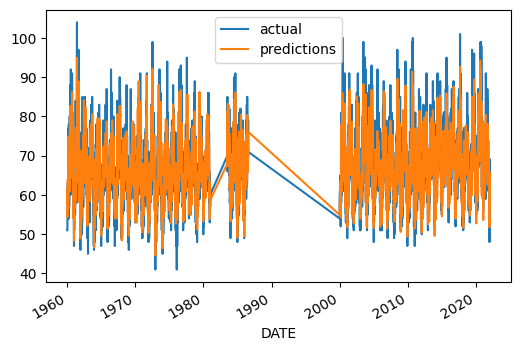

In [51]:
base.plot()

### Building a Prediction Function

Earlier, you may have written several lines of code to split the datasets, train the model, and make predictions. This means that whenever we want to re-run the model, we have to copy and paste that code.

Instead, we'll wrap this into a function to make it easier.

In [52]:
def create_predications(data):
    X_train, X_test, y_train, y_test = train_test_split(weather.drop('target',axis=1), 
                                                    weather['target'], test_size=0.30, 
                                                    random_state=101)
    reg.fit(X_train,y_train)
    predictions = reg.predict(X_test)
    error=mean_squared_error(y_test,predictions)
    base = pd.DataFrame()
    base["actual"] = y_test
    base["predictions"] = predictions
    graph=base.plot()
    return error,base,graph

(20.775984810624454,
             actual  predictions
 DATE                           
 2013-03-01    68.0    69.232841
 1970-02-20    62.0    65.690216
 2015-08-22    73.0    74.392344
 2009-02-28    62.0    62.716452
 1986-04-07    69.0    66.548611
 ...            ...          ...
 2016-09-26    84.0    87.614743
 1962-01-08    73.0    71.168796
 2016-05-11    66.0    67.207180
 2019-02-24    58.0    58.604965
 2020-02-19    68.0    64.602450
 
 [5058 rows x 2 columns],
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc1a184b9d0>)

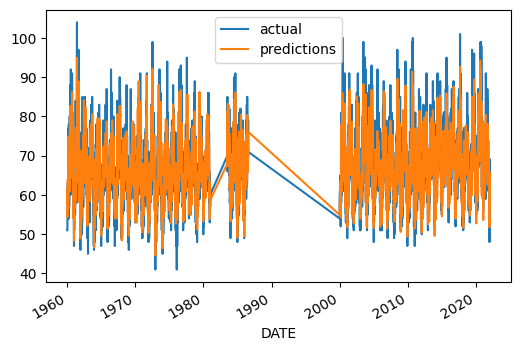

In [53]:
create_predications(weather)

### Adding in Rolling Means

Next, we'll add some predictors to the model to improve our accuracy. These predictors will be rolling averages of the temperature during a certain time period. For example, if the temperature on average in the last week has been 70F but is 80F today, today might be unseasonably warm, and the temperature might be lower tomorrow.

In python to do this we are going to use .rolling() and in the () we are going to say by how many observations.
In this case it will look back 30 days and find the average. If the data does not have 30 days worth of data it will just print out NaN

In [54]:
weather['month_max']=weather['max_daily_temp'].rolling(30).mean()
weather

,total_precipitation,max_daily_temp,min_daily_temp,target,month_max
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000
2022-01-24,0.0,60.0,39.0,57.0,57.066667
2022-01-25,0.0,57.0,43.0,57.0,57.200000


Next we are going to find the ratios between the average monthly temperature and the maximum and minimum temperature today.



In [55]:
weather["month_day_max"] = weather["month_max"] / weather["max_daily_temp"]

weather["max_min"] = weather["max_daily_temp"] / weather["min_daily_temp"]

weather

,total_precipitation,max_daily_temp,min_daily_temp,target,month_max,month_day_max,max_min
DATE,,,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN,NaN,1.633333
1960-01-02,0.0,49.0,29.0,54.0,NaN,NaN,1.689655
1960-01-03,0.0,54.0,35.0,54.0,NaN,NaN,1.542857
1960-01-04,0.0,54.0,36.0,55.0,NaN,NaN,1.500000
1960-01-05,0.0,55.0,33.0,53.0,NaN,NaN,1.666667
...,...,...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000,0.948333,1.463415
2022-01-24,0.0,60.0,39.0,57.0,57.066667,0.951111,1.538462
2022-01-25,0.0,57.0,43.0,57.0,57.200000,1.003509,1.325581


In [56]:
#since the first 30 days have a NaN in the columns they need to removed
weather=weather.iloc[30:]
weather

,total_precipitation,max_daily_temp,min_daily_temp,target,month_max,month_day_max,max_min
DATE,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571
...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581


(20.900499975760003,
             actual  predictions
 DATE                           
 1977-09-11    72.0    69.973649
 2017-08-01    84.0    74.149372
 2017-01-28    61.0    58.508816
 2008-03-13    60.0    61.144771
 2010-02-07    54.0    57.589567
 ...            ...          ...
 2000-06-14    77.0    88.038583
 2005-10-11    72.0    64.215611
 2014-08-08    67.0    73.260846
 2002-10-15    62.0    65.398228
 2017-08-04    72.0    73.979634
 
 [5049 rows x 2 columns],
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc1a226c5e0>)

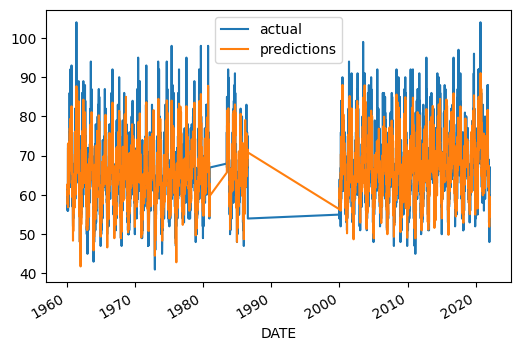

In [57]:
# rerunning the model again
create_predications(weather)


### Adding in Monthly and Daily Averages

We can now try some more predictors to continue improving our accuracy. We'll add in the historical monthly and daily temperatures. For example, if January 10th has been 40F for the past 10 years but is 60F this year, it might be unseasonably warm.

We have to be careful to only use past data to find the average temperature. We can't use data from 2011 in a daily average temperature from 2009.

In the code below we are going to group all the months together and then we are going to use apply in which the take all the values before a given day/month (in this case month as that is what we are grouping by). What we do not want to do is just take the mean of all the months because if the observations falls for example in Jan of 1970 you only want to use historical data before 1970 not after to actually create the average monthly temp. Since in a sense we are using future knowledge to we won't usually have.

To do this we are going to use the panda expanding method. What this does is that it only takes the previous rows and caluclates the mean

In [60]:
weather['monthly_avg']= weather["max_daily_temp"].groupby(weather.index.month).apply(lambda x: x.expanding(1).mean())
weather

<ipython-input-60-9e3a562d8e87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['monthly_avg']= weather["max_daily_temp"].groupby(weather.index.month).apply(lambda x: x.expanding(1).mean())


,total_precipitation,max_daily_temp,min_daily_temp,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000
...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955


Since we go the month daily we need to find the daily temp as well

In [62]:
weather["day_of_year_avg"] = weather["max_daily_temp"].groupby(weather.index.day).apply(lambda x: x.expanding(1).mean())
weather

<ipython-input-62-9da423e261cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather["day_of_year_avg"] = weather["max_daily_temp"].groupby(weather.index.day).apply(lambda x: x.expanding(1).mean())


,total_precipitation,max_daily_temp,min_daily_temp,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000,59.000000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000,59.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.000000
...,...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536,65.564195
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803,65.786618
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955,65.685353


In [65]:
weather["day_of_year_avg"] = weather["max_daily_temp"].groupby(weather.index.day).apply(lambda x: x.expanding(1).mean())
weather

<ipython-input-65-9da423e261cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather["day_of_year_avg"] = weather["max_daily_temp"].groupby(weather.index.day).apply(lambda x: x.expanding(1).mean())


,total_precipitation,max_daily_temp,min_daily_temp,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000,59.000000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000,59.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.000000
...,...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536,65.564195
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803,65.786618
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955,65.685353


(20.923236976526557,
             actual  predictions
 DATE                           
 1977-09-11    72.0    70.040114
 2017-08-01    84.0    74.241589
 2017-01-28    61.0    58.453585
 2008-03-13    60.0    60.966333
 2010-02-07    54.0    57.891207
 ...            ...          ...
 2000-06-14    77.0    87.272718
 2005-10-11    72.0    64.712044
 2014-08-08    67.0    73.107177
 2002-10-15    62.0    65.204018
 2017-08-04    72.0    73.408802
 
 [5049 rows x 2 columns],
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc19ba5b250>)

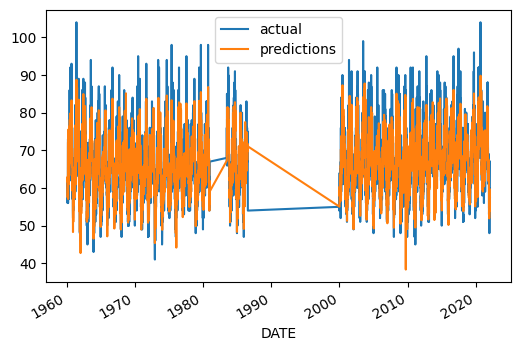

In [66]:
# rerunning the model again
create_predications(weather)


### Next Steps
We can try the following to help improve the accurcy:

- Try using data from your city instead of the data have
- Predict the weather seven days ahead (for an entire week). This will mirror a real weather forecast.
- Use data from multiple weather stations in a region. You can use this to fill in gaps in the data or to add more predictors.
- Use other columns in the original data as predictors. The data dictionary can help you.
- Create more predictor columns, like weekly average temperature.
- Use a different machine learning algorithm. We only tried ridge regression in this walkthrough.
- Implement backtesting so you can generate predictions for many years and evaluate accuracy more robustly.